<a href="https://colab.research.google.com/github/nannthd/bsc_dpdm22/blob/main/%5Bdataprep1%5D%20property%20estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# วิธี jtmeawNo1
link = 'https://docs.google.com/spreadsheets/d/1Wi3aLHRjFVH1B7TNrbjfrJ_2dxLAfHgAflNhkRlCmUU/export?format=xlsx'
detachedhouse = pd.read_excel(link,sheet_name='บ้าน')
land = pd.read_excel(link,sheet_name='ที่ดิน')
condo = pd.read_excel(link,sheet_name='คอนโด')
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
office = pd.read_excel(link,sheet_name='อาคารพาณิชย์')

#สรุปข้อมูลนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์

##บ้านเดี่ยว

In [4]:
detachedhouse

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1218,2,https://nayoo.co/khonkaen/posts/6260,บ้านเดี่ยว,มั่นใจ,620000,700000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [5]:
est1 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==1]
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [6]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,610.0,6.100000e+02,6.090000e+02
mean,1.0,3.382782e+06,3.240345e+06
std,0.0,5.000758e+06,4.692873e+06
min,1.0,2.600000e+05,2.200000e+05
25%,1.0,1.492500e+06,1.500000e+06
50%,1.0,2.540000e+06,2.500000e+06
75%,1.0,4.000000e+06,4.000000e+06
max,1.0,1.039350e+08,1.000000e+08


In [7]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    610
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [8]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     476
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    126
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
1 ขายไม่ได้แน่นอน                       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [9]:
est2 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==2]
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [10]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,610.0,6.100000e+02,4.980000e+02
mean,2.0,3.369097e+06,3.449197e+06
std,0.0,4.975575e+06,4.381048e+06
min,2.0,2.600000e+05,2.500000e+05
25%,2.0,1.467500e+06,1.892500e+06
50%,2.0,2.530000e+06,2.600000e+06
75%,2.0,4.067500e+06,4.200000e+06
max,2.0,1.039350e+08,8.000000e+07


In [11]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       499
ไม่มั่นใจ    111
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [12]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     367
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      117
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

# HW1 เปรียบเทียบความแตกต่างในการประเมินราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย ใช้ MAPE เป็นเกณฑ์ในการเปรียบเทียบ

In [13]:
from sklearn.metrics import mean_absolute_percentage_error as mape

##บ้านเดี่ยว

In [ ]:
detachedhouse

In [15]:
est1_nodup = est1.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
est2_nodup = est2.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [ ]:
est2['ประเมินโดย 1'] = est2['post id'].map(est1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2

In [ ]:
est2['ประเมินโดย 2'] = est2['post id'].map(est2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2

In [ ]:
table1 = est2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table1

In [19]:
table1 = table1.fillna(value={'ประเมินโดย 2':est2['ประเมินโดย 2'].mean()})
table1

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [20]:
table1.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
7,False,False,False,False
9,False,False,False,False
...,...,...,...,...
1210,False,False,False,False
1212,False,False,False,False
1214,False,False,False,False
1216,False,False,False,False


สรุป
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

##ที่ดิน

In [21]:
land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,4,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2200000.0,10000-22000,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
208,2,https://nayoo.co/khonkaen/posts/17145,ที่ดิน,มั่นใจ,3000000,2800000.0,"ราคาเสนอขาย 10,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [22]:
est1_land = land[land['ID ผู้ประเมิน']==1]
est1_land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,1800000.0,"8,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
3,1,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,8000000.0,"25,000-80,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,18000000.0,"8,000-35,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,35000000.0,"15,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
12,1,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2200000.0,"10,000-20,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
201,1,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"800-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
203,1,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,500000.0,"3,000-25,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
205,1,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2000000.0,"500-15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
207,1,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"500-25,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [23]:
est2_land = land[land['ID ผู้ประเมิน']==2]
est2_land

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [24]:
est2_land['ประเมินโดย 1'] = est2_land['post id'].map(est1_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_land

<ipython-input-24-1de716d3cecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_land['ประเมินโดย 1'] = est2_land['post id'].map(est1_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2000000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0


In [25]:
est2_land['ประเมินโดย 2'] = est2_land['post id'].map(est2_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_land

<ipython-input-25-2e0d3157cee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_land['ประเมินโดย 2'] = est2_land['post id'].map(est2_land.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0,2000000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0,12000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0,70000000.0
10,2,https://nayoo.co/khonkaen/posts/1732,ที่ดิน,มั่นใจ,65000000,60000000.0,"ราคาเสนอขาย 12,000 - 15,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,35000000.0,60000000.0
13,2,https://nayoo.co/khonkaen/posts/1866,ที่ดิน,มั่นใจ,3000000,2500000.0,"ราคาเสนอขาย 2,000 - 4,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...
200,2,https://nayoo.co/khonkaen/posts/14539,ที่ดิน,มั่นใจ,5000000,4000000.0,"ราคาเสนอขาย 8,000 - 10,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,4000000.0,4000000.0
202,2,https://nayoo.co/khonkaen/posts/16072,ที่ดิน,มั่นใจ,750000,750000.0,"ราคาเสนอขาย 7,000-8,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0,750000.0
204,2,https://nayoo.co/khonkaen/posts/17093,ที่ดิน,มั่นใจ,2650000,2500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2000000.0,2500000.0
206,2,https://nayoo.co/khonkaen/posts/17112,ที่ดิน,มั่นใจ,1300000,1500000.0,"ราคาเสนอขาย 3,000 - 5,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,1500000.0,1500000.0


In [26]:
table2 = est2_land[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table2

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [27]:
table2 = table2.fillna(value={'ประเมินโดย 2':est2_land['ประเมินโดย 2'].mean()})
table2

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [28]:
table2.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
4,False,False,False,False
7,False,False,False,False
10,False,False,False,False
13,False,False,False,False
...,...,...,...,...
200,False,False,False,False
202,False,False,False,False
204,False,False,False,False
206,False,False,False,False


In [29]:
price2 = table2['ราคาทรัพย์']
p_est1_land = table2['ประเมินโดย 1']
ma02 = mape(price2, p_est1_land)

In [30]:
p_est2_land = table2['ประเมินโดย 2']
ma002 = mape(price2, p_est2_land)
mape2 = mape(p_est2_land,p_est1_land)

In [31]:
mape2

0.42747750827626985

In [32]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma02} \nค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ {ma002}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 0.4083141479071181 
ค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ 0.3955633058050656


สรุป
จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

##คอนโด

In [33]:
condo

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [34]:
est1_condo = condo[condo['ID ผู้ประเมิน']==1]
est1_condo

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10
0,1,32.0,คอนโด,มั่นใจ,3500000,3500000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1,1,36.0,คอนโด,มั่นใจ,1930000,2200000.0,"50,000-90,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
2,1,603.0,คอนโด,มั่นใจ,2438000,2800000.0,"35,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,1,1395.0,คอนโด,มั่นใจ,1600000,2300000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,1443.0,คอนโด,มั่นใจ,1860000,1800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,1,1609.0,คอนโด,มั่นใจ,1490000,1500000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,1640.0,คอนโด,มั่นใจ,1280000,1600000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
7,1,1641.0,คอนโด,มั่นใจ,4290000,2700000.0,"60,000-130,000 บาท/ตารางเมตร",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3.0,ขายได้ ใช้ระยะเวลา 7-12 เดือน
8,1,1650.0,คอนโด,มั่นใจ,1700000,1550000.0,"30,000-70,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
9,1,1840.0,คอนโด,มั่นใจ,3790000,2800000.0,"30,000-80,000 บาท/ตารางเมตร",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4.0,ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [35]:
est1_condo.rename(columns={'ประเมินราคาซื้อ-ขาย':'ประเมินโดย 1'}, inplace=True)

In [36]:
table3 = est1_condo[['post id','ราคาทรัพย์','ประเมินโดย 1']]
table3

,post id,ราคาทรัพย์,ประเมินโดย 1
0,32.0,3500000,3500000.0
1,36.0,1930000,2200000.0
2,603.0,2438000,2800000.0
3,1395.0,1600000,2300000.0
4,1443.0,1860000,1800000.0
5,1609.0,1490000,1500000.0
6,1640.0,1280000,1600000.0
7,1641.0,4290000,2700000.0
8,1650.0,1700000,1550000.0
9,1840.0,3790000,2800000.0


In [37]:
table3.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [38]:
price3 = table3['ราคาทรัพย์']
p_est1_condo = table3['ประเมินโดย 1']
ma03 = mape(price3, p_est1_condo)

In [39]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma03}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 0.17349265946250259


##ทาวน์โฮม

In [40]:
townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [41]:
est1_townhome = townhome[townhome['ID ผู้ประเมิน']==1]
est1_townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,120.0
2,1,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,700000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,NaN,NaN,NaN,NaN
4,1,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,3500000.0,"8,000-80,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN
6,1,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3500000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
8,1,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,1000000.0,"8,000-80,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1000000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
126,1,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1500000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
127,1,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1600000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
128,1,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1600000.0,"3,000-35,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [42]:
est2_townhome = townhome[townhome['ID ผู้ประเมิน']==2]
est2_townhome

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN


In [43]:
est2_townhome['ประเมินโดย 1'] = est2_townhome['post id'].map(est1_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_townhome

<ipython-input-43-c94765b83e77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_townhome['ประเมินโดย 1'] = est2_townhome['post id'].map(est1_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0


In [44]:
est2_townhome['ประเมินโดย 2'] = est2_townhome['post id'].map(est2_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_townhome

<ipython-input-44-73009d640093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_townhome['ประเมินโดย 2'] = est2_townhome['post id'].map(est2_townhome.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/548,ทาวน์โฮม,มั่นใจ,1045000,1500000.0,ราคาซื้อขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0
3,2,https://nayoo.co/khonkaen/posts/549,ทาวน์โฮม,มั่นใจ,935000,1500000.0,ราคาเสนอขาย 1-2 ล้าน/คูหา,NaN,1 ขายไม่ได้แน่นอน,NaN,NaN,NaN,NaN,700000.0,1500000.0
5,2,https://nayoo.co/khonkaen/posts/579,ทาวน์โฮม,มั่นใจ,2520000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,4000000.0
7,2,https://nayoo.co/khonkaen/posts/580,ทาวน์โฮม,มั่นใจ,3850000,3200000.0,ราคาเสนอขาย 3 - 5 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,3500000.0,3200000.0
9,2,https://nayoo.co/khonkaen/posts/582,ทาวน์โฮม,มั่นใจ,544000,800000.0,"ราคาเสนอขาย 700,000 - 1,000,000 บาท / คูหา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,800000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2,https://nayoo.co/khonkaen/posts/18547,ทาวน์โฮม,มั่นใจ,1105000,1200000.0,ราคาเสนอขาย1.2-1.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1000000.0,1200000.0
236,2,https://nayoo.co/khonkaen/posts/18551,ทาวน์โฮม,มั่นใจ,1440000,1700000.0,ราคาเสนอขาย 1.7-2.0ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1500000.0,1700000.0
237,2,https://nayoo.co/khonkaen/posts/19434,ทาวน์โฮม,มั่นใจ,2000000,1900000.0,ราคาเสนอขาย 1.8-2.0 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1900000.0
238,2,https://nayoo.co/khonkaen/posts/19501,ทาวน์โฮม,มั่นใจ,1790000,1700000.0,ราคาเสนอขาย 1.7-1.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,1600000.0,1700000.0


In [45]:
table4 = est2_townhome[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table4

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


In [46]:
table4 = table4.fillna(value={'ประเมินโดย 2':est2_townhome['ประเมินโดย 2'].mean()})
table4

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


In [47]:
table4.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
7,False,False,False,False
9,False,False,False,False
...,...,...,...,...
235,False,False,False,False
236,False,False,False,False
237,False,False,False,False
238,False,False,False,False


In [48]:
price4 = table4['ราคาทรัพย์']
p_est1_townhome = table4['ประเมินโดย 1']
ma04 = mape(price4, p_est1_townhome)

In [49]:
p_est2_townhome = table4['ประเมินโดย 2']
ma004 = mape(price4, p_est2_townhome)
mape4 = mape(p_est2_townhome,p_est1_townhome)

In [50]:
mape4 

0.10619748830198178

In [51]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma04} \nค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ {ma004}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 0.11573478246014954 
ค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ 0.09255174455679427


สรุป จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

##อาคารพาณิชย์

In [52]:
office

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
196,1,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000,1500000.0,"3,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN
198,1,https://nayoo.co/khonkaen/posts/7705,อาคารพาณิชย์/สำนักงาน,มั่นใจ,2200000,2500000.0,"3,000-80,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [53]:
est1_office = office[office['ID ผู้ประเมิน']==1]
est1_office

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,6000000.0,"8,000-30,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,"8,000-40,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
4,1,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,13500000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
6,1,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,"8,000-60,000",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
8,1,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,2200000.0,"8,000-50,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
190,1,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3600000.0,"3,000-50,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
192,1,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,มั่นใจ,4500000,2300000.0,"3,000-40,000 บาท/ตารางวา",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
194,1,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6900000,3300000.0,"3,000-80,000 บาท/ตารางวา",NaN,1 ขายไม่ได้แน่นอน
196,1,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,มั่นใจ,12000000,1500000.0,"3,000-120,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี


In [54]:
est2_office = office[office['ID ผู้ประเมิน']==2]
est2_office

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
...,...,...,...,...,...,...,...,...,...
191,2,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,4000000.0,ราคาเสนอขาย 3.9-4.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
193,2,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,4500000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN


In [55]:
est2_office['ประเมินโดย 1'] = est2_office['post id'].map(est1_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_office

<ipython-input-55-96964ddc3347>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_office['ประเมินโดย 1'] = est2_office['post id'].map(est1_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0
...,...,...,...,...,...,...,...,...,...,...
191,2,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,4000000.0,ราคาเสนอขาย 3.9-4.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0
193,2,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,4500000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,2300000.0
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,3300000.0
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN,1500000.0


In [56]:
est2_office['ประเมินโดย 2'] = est2_office['post id'].map(est2_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
est2_office

<ipython-input-56-97e4cc7a5de5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2_office['ประเมินโดย 2'] = est2_office['post id'].map(est2_office.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0,8000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0,20000000.0
7,2,https://nayoo.co/khonkaen/posts/22,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3500000,4000000.0,ราคาเสนอขาย 3-5 ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,4000000.0,4000000.0
9,2,https://nayoo.co/khonkaen/posts/24,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,3000000.0,ราคาซื้อขาย 3-4 ล้านบาท / คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,2200000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...
191,2,https://nayoo.co/khonkaen/posts/7137,อาคารพาณิชย์/สำนักงาน,มั่นใจ,3900000,4000000.0,ราคาเสนอขาย 3.9-4.5ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3600000.0,4000000.0
193,2,https://nayoo.co/khonkaen/posts/7138,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,4500000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,2300000.0,NaN
195,2,https://nayoo.co/khonkaen/posts/7439,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,6900000,NaN,NaN,ไม่มีฐานข้อมูลบริเวณนี้,NaN,3300000.0,NaN
197,2,https://nayoo.co/khonkaen/posts/7668,อาคารพาณิชย์/สำนักงาน,ไม่มั่นใจ,12000000,NaN,NaN,ไม่มีฐานข้อมูล,NaN,1500000.0,NaN


In [57]:
table5 = est2_office[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table5

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN


In [58]:
table5 = table5.fillna(value={'ประเมินโดย 2':est2_office['ประเมินโดย 2'].mean()})
table5

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8.000000e+06
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,1.200000e+07
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,2.000000e+07
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4.000000e+06
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3.000000e+06
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4.000000e+06
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,4.725275e+06
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,4.725275e+06
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,4.725275e+06


In [59]:
table5.isnull()

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,False,False,False,False
3,False,False,False,False
5,False,False,False,False
7,False,False,False,False
9,False,False,False,False
...,...,...,...,...
191,False,False,False,False
193,False,False,False,False
195,False,False,False,False
197,False,False,False,False


In [60]:
price5 = table5['ราคาทรัพย์']
p_est1_office = table5['ประเมินโดย 1']
ma05 = mape(price5, p_est1_office)

In [61]:
p_est2_office = table5['ประเมินโดย 2']
ma005 = mape(price5, p_est2_office)
mape5 = mape(p_est2_office,p_est1_office)

In [62]:
mape5 

0.1417028802827348

In [63]:
print(f'ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ {ma05} \nค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ {ma005}')

ค่า MAPE ผู้ประเมินคนที่ 1 เท่ากับ 0.13227450703608717 
ค่า MAPE ผู้ประเมินคนที่ 2 เท่ากับ 0.1391528619829938


สรุป จะเห็นว่าค่า MAPE ที่ประเมินโดยคนที่ 2 มีค่าน้อยกว่าคนที่ 1

ดังนั้น การประเมินโดยคนที่ 2 มีการประเมินราคาซื้อ-ขาย ได้ใกล้เคียงกับราคาทรัพย์ มากกว่าผู้ประเมินคนที่ 1

#เขียน funtion ตรวจสอบค่าที่เติม 0 ผิด

##บ้านเดี่ยว

In [64]:
table1 = est2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table1

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


In [65]:
def check(in1,in2) :
    return max(in1/in2,in2/in1)

In [66]:
check(100,12)

8.333333333333334

In [67]:
check(100,1200)

12.0

In [68]:
check1 = list()
for row in table1.iterrows():
  check1.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check1

[1.156,
 1.1818181818181819,
 1.21,
 1.2571428571428571,
 1.1,
 1.271111111111111,
 1.36,
 1.0153846153846153,
 1.3684,
 1.031941031941032,
 1.0476190476190477,
 1.1785714285714286,
 1.0592592592592593,
 1.188,
 1.1275,
 1.1,
 1.1157142857142857,
 1.0371428571428571,
 1.0588235294117647,
 1.2571428571428571,
 1.13125,
 1.0,
 1.0888888888888888,
 1.0892333472978635,
 1.0444444444444445,
 1.0,
 1.0434782608695652,
 1.02,
 1.25,
 1.13,
 1.0714285714285714,
 1.0,
 1.0,
 1.3833333333333333,
 1.03125,
 1.1611111111111112,
 1.0526315789473684,
 1.5384615384615385,
 1.0227272727272727,
 1.1363636363636365,
 1.1111111111111112,
 1.1290322580645162,
 1.1388888888888888,
 nan,
 1.24,
 1.3093125,
 1.21,
 1.0123636363636364,
 1.0692857142857144,
 1.0158013544018059,
 1.4685314685314685,
 1.1777777777777778,
 1.1942857142857144,
 1.0714285714285714,
 1.0710526315789475,
 1.036,
 1.046,
 1.09375,
 1.2140833670578712,
 1.1090909090909091,
 1.1333333333333333,
 1.1866666666666668,
 1.036,
 1.0031347962

In [69]:
check2 = list()
for row in table1.iterrows():
  check2.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check2

[1.0703703703703704,
 1.0833333333333333,
 1.487603305785124,
 1.1891891891891893,
 1.1,
 1.0314685314685315,
 1.050420168067227,
 1.0416666666666667,
 1.1403333333333334,
 1.0175,
 1.0476190476190477,
 1.03125,
 1.0214285714285714,
 1.0607142857142857,
 1.025,
 nan,
 1.0847222222222221,
 1.0371428571428571,
 1.0,
 1.125,
 1.1049723756906078,
 1.1904761904761905,
 1.0888888888888888,
 1.0054461667364893,
 1.0425531914893618,
 1.125,
 1.0434782608695652,
 1.0364145658263306,
 1.0,
 1.0324483775811208,
 1.04,
 1.2,
 1.04,
 1.1318181818181818,
 1.0,
 1.045,
 1.0526315789473684,
 3.3333333333333335,
 1.0227272727272727,
 1.04,
 1.08,
 1.2903225806451613,
 1.1219512195121952,
 1.125,
 1.075268817204301,
 1.2322941176470588,
 1.0755555555555556,
 1.0775862068965518,
 1.169004676018704,
 1.0158013544018059,
 1.048951048951049,
 1.1777777777777778,
 1.045,
 1.0666666666666667,
 1.0435897435897437,
 1.036,
 1.046,
 1.0857142857142856,
 1.0117361392148927,
 1.1090909090909091,
 1.040816326530612

In [70]:
table1['check1'] = check1
table1['check2'] = check2
table1

<ipython-input-70-77ae4f2d67f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['check1'] = check1
<ipython-input-70-77ae4f2d67f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table1['check2'] = check2


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0,1.156000,1.070370
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0,1.181818,1.083333
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0,1.210000,1.487603
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0,1.257143,1.189189
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0,1.100000,1.100000
...,...,...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0,1.147541,1.220000
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0,1.694915,1.016949
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0,1.025000,1.230000


In [71]:
table1.sort_values(by=['check1'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
444,https://nayoo.co/khonkaen/posts/1133,1984000,220000.0,NaN,9.018182,NaN
978,https://nayoo.co/khonkaen/posts/5959,1138000,3500000.0,NaN,3.075571,NaN
1179,https://nayoo.co/khonkaen/posts/6117,570000,1600000.0,NaN,2.807018,NaN
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
1165,https://nayoo.co/khonkaen/posts/6106,2200000,NaN,NaN,NaN,NaN
1183,https://nayoo.co/khonkaen/posts/6126,2240000,NaN,2200000.0,NaN,1.018182
1195,https://nayoo.co/khonkaen/posts/6156,3500000,NaN,4500000.0,NaN,1.285714
1200,https://nayoo.co/khonkaen/posts/6158,3850000,NaN,NaN,NaN,NaN


In [72]:
table1.sort_values(by=['check2'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check1,check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,2850000,2500000.0,29000000.0,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,8019000,7900000.0,80000000.0,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,390000,600000.0,1300000.0,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
1179,https://nayoo.co/khonkaen/posts/6117,570000,1600000.0,NaN,2.807018,NaN
1197,https://nayoo.co/khonkaen/posts/6157,3850000,3800000.0,NaN,1.013158,NaN
1199,https://nayoo.co/khonkaen/posts/6261,620000,800000.0,NaN,1.290323,NaN
1200,https://nayoo.co/khonkaen/posts/6158,3850000,NaN,NaN,NaN,NaN


##ที่ดิน

In [73]:
table2 = est2_land[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table2

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


In [74]:
check12 = list()
for row in table2.iterrows():
  check12.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check12

[1.5555555555555556,
 1.8625,
 5.0,
 1.8571428571428572,
 1.3636363636363635,
 1.5,
 4.714285714285714,
 1.1363636363636365,
 1.6,
 1.1964285714285714,
 1.2,
 1.2,
 1.125,
 1.1666666666666667,
 1.0476190476190477,
 1.2105263157894737,
 1.2,
 1.1666666666666667,
 10.208333333333334,
 1.35,
 1.1428571428571428,
 1.1,
 1.411764705882353,
 1.5,
 8.571428571428571,
 1.2515644555694618,
 2.25,
 1.4074074074074074,
 4.7825,
 1.25,
 4.0,
 1.2,
 2.5,
 1.2727272727272727,
 1.0204081632653061,
 1.2666666666666666,
 1.0833333333333333,
 1.0416666666666667,
 2.5,
 1.2882882882882882,
 1.6666666666666667,
 1.1111111111111112,
 1.25,
 1.2363636363636363,
 1.2857142857142858,
 1.0101010101010102,
 1.8125,
 2.8857142857142857,
 1.39,
 1.3,
 1.39,
 12.307692307692308,
 1.2380952380952381,
 1.25,
 1.29,
 1.481111111111111,
 1.0,
 1.4285714285714286,
 1.2761363636363636,
 1.0968333333333333,
 1.0,
 2.25,
 1.1764705882352942,
 1.1346153846153846,
 1.25,
 1.1875,
 1.5,
 1.0625,
 1.2075,
 1.2290916666666667,

In [75]:
check22 = list()
for row in table2.iterrows():
  check22.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check22

[1.4,
 1.2416666666666667,
 1.2857142857142858,
 1.0833333333333333,
 1.2,
 1.2,
 1.2692307692307692,
 1.1363636363636365,
 1.2,
 1.1166666666666667,
 1.3333333333333333,
 1.0909090909090908,
 2.8125,
 1.0,
 1.0606060606060606,
 1.9166666666666667,
 1.0416666666666667,
 1.0285714285714285,
 13.61111111111111,
 1.9285714285714286,
 1.1111111111111112,
 1.1,
 1.1764705882352942,
 1.25,
 10.909090909090908,
 1.0012515644555695,
 1.1111111111111112,
 1.35,
 1.2753333333333334,
 1.25,
 1.1666666666666667,
 1.2,
 1.1904761904761905,
 1.12,
 1.225,
 1.2666666666666666,
 1.2,
 1.2,
 1.1363636363636365,
 1.144,
 1.2,
 1.1627906976744187,
 1.0666666666666667,
 1.0588235294117647,
 1.2352941176470589,
 1.2375,
 1.16,
 1.01,
 1.1583333333333334,
 1.0833333333333333,
 1.1583333333333334,
 1.3,
 1.0476190476190477,
 1.0714285714285714,
 1.075,
 1.333,
 1.0769230769230769,
 1.25,
 1.40375,
 1.0968333333333333,
 1.1363636363636365,
 1.125,
 1.0625,
 1.18,
 1.25,
 1.0555555555555556,
 1.2,
 5.294117647

In [76]:
table2['check12'] = check12
table2['check22'] = check22
table2

<ipython-input-76-59d32e5afa06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['check12'] = check12
<ipython-input-76-59d32e5afa06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table2['check22'] = check22


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check12,check22
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0,1.555556,1.400000
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0,1.862500,1.241667
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0,1.857143,1.083333
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0,1.363636,1.200000
...,...,...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0,1.250000,1.250000
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0,1.325000,1.060000
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0,1.153846,1.153846


In [77]:
table2.sort_values(by=['check12'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check12,check22
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [78]:
table2.sort_values(by=['check22'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check12,check22
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000


## คอนโด

In [79]:
table3 = est1_condo[['post id','ราคาทรัพย์','ประเมินโดย 1']]
table3

,post id,ราคาทรัพย์,ประเมินโดย 1
0,32.0,3500000,3500000.0
1,36.0,1930000,2200000.0
2,603.0,2438000,2800000.0
3,1395.0,1600000,2300000.0
4,1443.0,1860000,1800000.0
5,1609.0,1490000,1500000.0
6,1640.0,1280000,1600000.0
7,1641.0,4290000,2700000.0
8,1650.0,1700000,1550000.0
9,1840.0,3790000,2800000.0


In [80]:
check13 = list()
for row in table3.iterrows():
  check13.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check13

[1.0,
 1.1398963730569949,
 1.1484823625922889,
 1.4375,
 1.0333333333333334,
 1.0067114093959733,
 1.25,
 1.5888888888888888,
 1.096774193548387,
 1.3535714285714286]

In [81]:
table3['check13'] = check13
table3

<ipython-input-81-761d1b0e9ee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table3['check13'] = check13


,post id,ราคาทรัพย์,ประเมินโดย 1,check13
0,32.0,3500000,3500000.0,1.000000
1,36.0,1930000,2200000.0,1.139896
2,603.0,2438000,2800000.0,1.148482
3,1395.0,1600000,2300000.0,1.437500
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
6,1640.0,1280000,1600000.0,1.250000
7,1641.0,4290000,2700000.0,1.588889
8,1650.0,1700000,1550000.0,1.096774
9,1840.0,3790000,2800000.0,1.353571


In [82]:
table3.sort_values(by=['check13'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,check13
7,1641.0,4290000,2700000.0,1.588889
3,1395.0,1600000,2300000.0,1.437500
9,1840.0,3790000,2800000.0,1.353571
6,1640.0,1280000,1600000.0,1.250000
2,603.0,2438000,2800000.0,1.148482
1,36.0,1930000,2200000.0,1.139896
8,1650.0,1700000,1550000.0,1.096774
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
0,32.0,3500000,3500000.0,1.000000


## ทาวน์โฮม

In [83]:
table4 = est2_townhome[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table4

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0
...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0


In [84]:
check14 = list()
for row in table4.iterrows():
  check14.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check14

[1.4928571428571429,
 1.3357142857142856,
 1.3888888888888888,
 1.1,
 1.838235294117647,
 1.0263929618768328,
 1.0330578512396693,
 1.2820512820512822,
 1.3138888888888889,
 1.1363636363636365,
 1.1,
 1.144,
 1.0263157894736843,
 1.0083333333333333,
 1.0476190476190477,
 1.0666666666666667,
 1.0266666666666666,
 1.05,
 1.1,
 1.1560693641618498,
 1.1,
 1.322314049586777,
 1.048951048951049,
 1.1,
 1.12,
 1.1428571428571428,
 1.0666666666666667,
 1.069182389937107,
 1.1083333333333334,
 1.037037037037037,
 1.040909090909091,
 1.08,
 1.2222222222222223,
 1.0416666666666667,
 1.036,
 1.1538461538461537,
 1.1235955056179776,
 1.04,
 1.0502283105022832,
 1.079136690647482,
 1.02,
 1.0714285714285714,
 1.00625,
 1.3333333333333333,
 1.25,
 1.0416666666666667,
 1.2,
 1.0040160642570282,
 1.1510791366906474,
 1.0391304347826087,
 1.0681818181818181,
 1.1428571428571428,
 1.0833333333333333,
 1.07,
 1.46,
 1.125,
 6.257142857142857,
 1.0588235294117647,
 1.0526315789473684,
 1.1071428571428572,


In [85]:
check24 = list()
for row in table4.iterrows():
  check24.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check24

[1.4354066985645932,
 1.6042780748663101,
 1.5873015873015872,
 1.203125,
 1.4705882352941178,
 1.065625,
 1.1,
 1.2820512820512822,
 1.1825,
 1.0620689655172413,
 1.1,
 1.144,
 1.0256410256410255,
 1.0371428571428571,
 1.1,
 1.0666666666666667,
 1.0266666666666666,
 1.05,
 1.0909090909090908,
 1.4450867052023122,
 1.1,
 1.0743801652892562,
 1.1916666666666667,
 1.03125,
 1.12,
 1.0294117647058822,
 1.0666666666666667,
 1.069182389937107,
 1.1083333333333334,
 1.037037037037037,
 1.0043668122270741,
 1.0,
 1.0,
 1.04,
 1.036,
 1.0833333333333333,
 1.0112359550561798,
 1.0,
 1.004566210045662,
 1.0692307692307692,
 1.0784313725490196,
 1.0714285714285714,
 1.00625,
 1.288888888888889,
 1.0,
 1.2083333333333333,
 1.0416666666666667,
 1.0826086956521739,
 1.0692307692307692,
 1.0391304347826087,
 1.0217391304347827,
 1.0294117647058822,
 1.0,
 1.1214953271028036,
 1.004566210045662,
 1.0,
 5.475,
 1.0,
 1.0,
 1.0333333333333334,
 1.047486033519553,
 1.0,
 1.045,
 1.0666666666666667,
 1.06

In [86]:
table4['check14'] = check14
table4['check24'] = check24
table4

<ipython-input-86-9db1c81be08f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table4['check14'] = check14
<ipython-input-86-9db1c81be08f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table4['check24'] = check24


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check14,check24
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
7,https://nayoo.co/khonkaen/posts/580,3850000,3500000.0,3200000.0,1.100000,1.203125
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
...,...,...,...,...,...,...
235,https://nayoo.co/khonkaen/posts/18547,1105000,1000000.0,1200000.0,1.105000,1.085973
236,https://nayoo.co/khonkaen/posts/18551,1440000,1500000.0,1700000.0,1.041667,1.180556
237,https://nayoo.co/khonkaen/posts/19434,2000000,1600000.0,1900000.0,1.250000,1.052632
238,https://nayoo.co/khonkaen/posts/19501,1790000,1600000.0,1700000.0,1.118750,1.052941


In [87]:
table4.sort_values(by=['check14'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check14,check24
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
9,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
216,https://nayoo.co/khonkaen/posts/17535,840000,1300000.0,1000000.0,1.547619,1.190476
1,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...
162,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1600000.0,1.006250,1.006250
228,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2200000.0,1.005025,1.105528
167,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2300000.0,1.004016,1.082609
200,https://nayoo.co/khonkaen/posts/13411,3200000,3200000.0,3200000.0,1.000000,1.000000


In [88]:
table4.sort_values(by=['check24'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check14,check24
176,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
234,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1500000.0,1.017857,1.900000
3,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
5,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
206,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...
202,https://nayoo.co/khonkaen/posts/15111,2200000,2500000.0,2200000.0,1.136364,1.000000
209,https://nayoo.co/khonkaen/posts/17511,1700000,1500000.0,1700000.0,1.133333,1.000000
212,https://nayoo.co/khonkaen/posts/17516,1800000,1700000.0,1800000.0,1.058824,1.000000
213,https://nayoo.co/khonkaen/posts/17518,1200000,1100000.0,1200000.0,1.090909,1.000000


## อาคารพาณิชย์

In [89]:
table5 = est2_office[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
table5

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN


In [90]:
check15 = list()
for row in table5.iterrows():
  check15.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 1']))
check15

[1.1,
 1.0526315789473684,
 1.6666666666666667,
 1.1428571428571428,
 1.7727272727272727,
 1.3333333333333333,
 1.0869565217391304,
 1.105263157894737,
 1.0,
 1.075,
 1.0330578512396693,
 1.1,
 1.0101010101010102,
 1.1,
 1.1611111111111112,
 1.2833333333333334,
 1.2999411764705882,
 1.023391812865497,
 1.0256410256410255,
 1.0048076923076923,
 1.083076923076923,
 1.1,
 1.02880658436214,
 1.0227272727272727,
 1.3095238095238095,
 1.2839506172839505,
 1.0153846153846153,
 1.0227272727272727,
 1.1366666666666667,
 1.1366666666666667,
 1.0047846889952152,
 1.0371401902109394,
 1.0,
 1.120625,
 1.0671936758893281,
 1.0266666666666666,
 1.034,
 1.0421052631578946,
 1.0476190476190477,
 1.0214285714285714,
 1.4025974025974026,
 1.0526315789473684,
 1.1511627906976745,
 1.5172413793103448,
 1.1363636363636365,
 1.064516129032258,
 1.1297297297297297,
 1.04875,
 1.3333333333333333,
 1.0833333333333333,
 1.08,
 1.1176470588235294,
 1.0285714285714285,
 1.3333333333333333,
 1.0294117647058822,
 1

In [91]:
check25 = list()
for row in table5.iterrows():
  check25.append(check(row[1]['ราคาทรัพย์'],row[1]['ประเมินโดย 2']))
check25

[1.2121212121212122,
 1.0526315789473684,
 1.125,
 1.1428571428571428,
 1.3,
 1.2,
 1.0952380952380953,
 1.1904761904761905,
 1.1428571428571428,
 1.1627906976744187,
 1.0330578512396693,
 1.134375,
 1.1,
 1.0576923076923077,
 1.0047846889952152,
 1.2833333333333334,
 1.0860219919453369,
 1.023391812865497,
 1.0256410256410255,
 1.1117021276595744,
 1.0057142857142858,
 1.2222222222222223,
 1.02880658436214,
 1.1733333333333333,
 1.3888888888888888,
 1.0125,
 1.32,
 1.0227272727272727,
 1.0263929618768328,
 1.0263929618768328,
 1.0047846889952152,
 1.21,
 1.1,
 1.0245714285714285,
 1.0671936758893281,
 1.0266666666666666,
 1.175,
 1.0606060606060606,
 1.0227272727272727,
 1.0214285714285714,
 1.0389610389610389,
 1.0526315789473684,
 1.0101010101010102,
 2.206896551724138,
 1.0389610389610389,
 1.1,
 1.0047846889952152,
 nan,
 nan,
 1.0833333333333333,
 1.0,
 1.0526315789473684,
 1.09375,
 1.0,
 1.0,
 1.00000020000004,
 1.0144927536231885,
 1.3,
 1.0144927536231885,
 1.1764705882352942

In [92]:
table5['check15'] = check15
table5['check25'] = check25
table5

<ipython-input-92-a4c9c0f71f90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table5['check15'] = check15
<ipython-input-92-a4c9c0f71f90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table5['check25'] = check25


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check15,check25
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0,1.100000,1.212121
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0,1.052632,1.052632
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0,1.142857,1.142857
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
...,...,...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0,1.083333,1.025641
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN,1.956522,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN,2.090909,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN,8.000000,NaN


In [93]:
table5.sort_values(by=['check15'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check15,check25
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN,8.000000,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN,2.090909,NaN
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN,1.956522,NaN
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
177,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000


In [94]:
table5.sort_values(by=['check25'],ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,check15,check25
163,https://nayoo.co/khonkaen/posts/6009,2250000,2700000.0,5000000.0,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
49,https://nayoo.co/khonkaen/posts/602,2520000,3300000.0,3500000.0,1.309524,1.388889
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
...,...,...,...,...,...,...
157,https://nayoo.co/khonkaen/posts/3898,4200000,4000000.0,NaN,1.050000,NaN
189,https://nayoo.co/khonkaen/posts/6354,2200000,2500000.0,NaN,1.136364,NaN
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN,1.956522,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN,2.090909,NaN


# HW2 แก้ไข ข้อมูลแล้วคำนวณ MAPE ใหม่อีกรอบมาเทียบกัน

In [108]:
link = 'https://docs.google.com/spreadsheets/d/1Wi3aLHRjFVH1B7TNrbjfrJ_2dxLAfHgAflNhkRlCmUU/export?format=xlsx'
link2 = 'https://docs.google.com/spreadsheets/d/1KR3lQs5oACHVmoT_M1_fADCYCFCbc6a4YHtQZvSTx78/export?format=xlsx'

##บ้านเดี่ยว

In [109]:
#ก่อนแก้
detachedhouse = pd.read_excel(link,sheet_name='บ้าน')
id1 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = detachedhouse[detachedhouse['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%


In [110]:
#หลังแก้
detachedhouse2 = pd.read_excel(link2,sheet_name='บ้าน')
id1 = detachedhouse2[detachedhouse2['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = detachedhouse2[detachedhouse2['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน2'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])


ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 11.67%
นักประเมิน คนที่ 2 = 9.26%


##ที่ดิน

In [111]:
#ก่อนแก้
land = pd.read_excel(link,sheet_name='ที่ดิน')
id12 = land[land['ID ผู้ประเมิน']==1]
id12 = id12.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id22 = land[land['ID ผู้ประเมิน']==2]
id22 = id22.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id12MAPE = mape(id12['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id12['ราคาทรัพย์']))
id22MAPE = mape(id22['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id22['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id12MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id22MAPE*100:.2f}%')
id22['ประเมิน2'] = id22['post id'].map(id12.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id22_d = id22.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%


In [112]:
#หลังแก้
land2 = pd.read_excel(link2,sheet_name='ที่ดิน')
id12 = land2[land2['ID ผู้ประเมิน']==1]
id12 = id12.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id22 = land2[land2['ID ผู้ประเมิน']==2]
id22 = id22.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id12MAPE = mape(id12['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id12['ราคาทรัพย์']))
id22MAPE = mape(id22['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id22['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nที่ดิน\nนักประเมิน คนที่ 1 = {id12MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id22MAPE*100:.2f}%')
id22['ประเมิน2'] = id22['post id'].map(id12.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id22_d = id22.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ที่ดิน
นักประเมิน คนที่ 1 = 45.13%
นักประเมิน คนที่ 2 = 19.89%


## ทาวน์โฮม

In [113]:
#ก่อนแก้
townhome = pd.read_excel(link,sheet_name='ทาวน์โฮม')
id13 = townhome[townhome['ID ผู้ประเมิน']==1]
id13 = id13.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id23 = townhome[townhome['ID ผู้ประเมิน']==2]
id23 = id23.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id13MAPE = mape(id13['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id13['ราคาทรัพย์']))
id23MAPE = mape(id23['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id23['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {id13MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id23MAPE*100:.2f}%')
id23['ประเมิน2'] = id23['post id'].map(id13.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id23_d = id23.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%


In [114]:
#หลังแก้
townhome2 = pd.read_excel(link2,sheet_name='ทาวน์โฮม')
id13 = townhome2[townhome2['ID ผู้ประเมิน']==1]
id13 = id13.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id23 = townhome2[townhome2['ID ผู้ประเมิน']==2]
id23 = id23.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id13MAPE = mape(id13['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id13['ราคาทรัพย์']))
id23MAPE = mape(id23['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id23['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nทาวน์โฮม\nนักประเมิน คนที่ 1 = {id13MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id23MAPE*100:.2f}%')
id23['ประเมิน2'] = id23['post id'].map(id13.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id23_d = id23.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
ทาวน์โฮม
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 8.85%


## อาคารพาณิชย์

In [115]:
#ก่อนแก้
office = pd.read_excel(link,sheet_name='อาคารพาณิชย์')
id14 = office[office['ID ผู้ประเมิน']==1]
id14 = id14.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id24 = office[office['ID ผู้ประเมิน']==2]
id24 = id24.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id14MAPE = mape(id14['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id14['ราคาทรัพย์']))
id24MAPE = mape(id24['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id24['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id14MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id24MAPE*100:.2f}%')
id24['ประเมิน2'] = id24['post id'].map(id14.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id24_d = id24.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%


In [116]:
#หลังแก้
office2 = pd.read_excel(link2,sheet_name='อาคารพาณิชย์')
id14 = office2[office2['ID ผู้ประเมิน']==1]
id14 = id14.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id24 = office2[office2['ID ผู้ประเมิน']==2]
id24 = id24.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id14MAPE = mape(id14['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id14['ราคาทรัพย์']))
id24MAPE = mape(id24['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id24['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nอาคารพาณิชย์\nนักประเมิน คนที่ 1 = {id14MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id24MAPE*100:.2f}%')
id24['ประเมิน2'] = id24['post id'].map(id14.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id24_d = id24.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
อาคารพาณิชย์
นักประเมิน คนที่ 1 = 13.45%
นักประเมิน คนที่ 2 = 9.49%


# Load ตารางจาก google sheet

In [104]:
import pandas as pd

In [107]:
# วิธี jtmeawNo1
linkex = 'https://docs.google.com/spreadsheets/d/1Wi3aLHRjFVH1B7TNrbjfrJ_2dxLAfHgAflNhkRlCmUU/export?format=xlsx'
land01ex = pd.read_excel(linkex,sheet_name='ที่ดิน')

# HW3 visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [143]:
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize']=[40,20]   

from pandas import DataFrame  

In [144]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
!ls
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')
     

drive  sample_data  thsarabunnew-webfont.ttf  thsarabunnew-webfont.ttf.1


##บ้านเดี่ยว

In [ ]:
Est1 = detachedhouse2[detachedhouse2['ID ผู้ประเมิน']==1]
Est2 = detachedhouse2[detachedhouse2['ID ผู้ประเมิน']==2]
Est1_nodup = Est1.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est2_nodup = Est2.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est2['ประเมินโดย 1'] = Est2['post id'].map(Est1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Est2['ประเมินโดย 2'] = Est2['post id'].map(Est2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Table01 = Est2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
Table1 = Table01.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
Table1

###แสดงความสัมพันธ์ราคาตั้งขายและราคาประเมิน

In [ ]:
dataF1 = DataFrame(Table1,columns=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
print(dataF1)

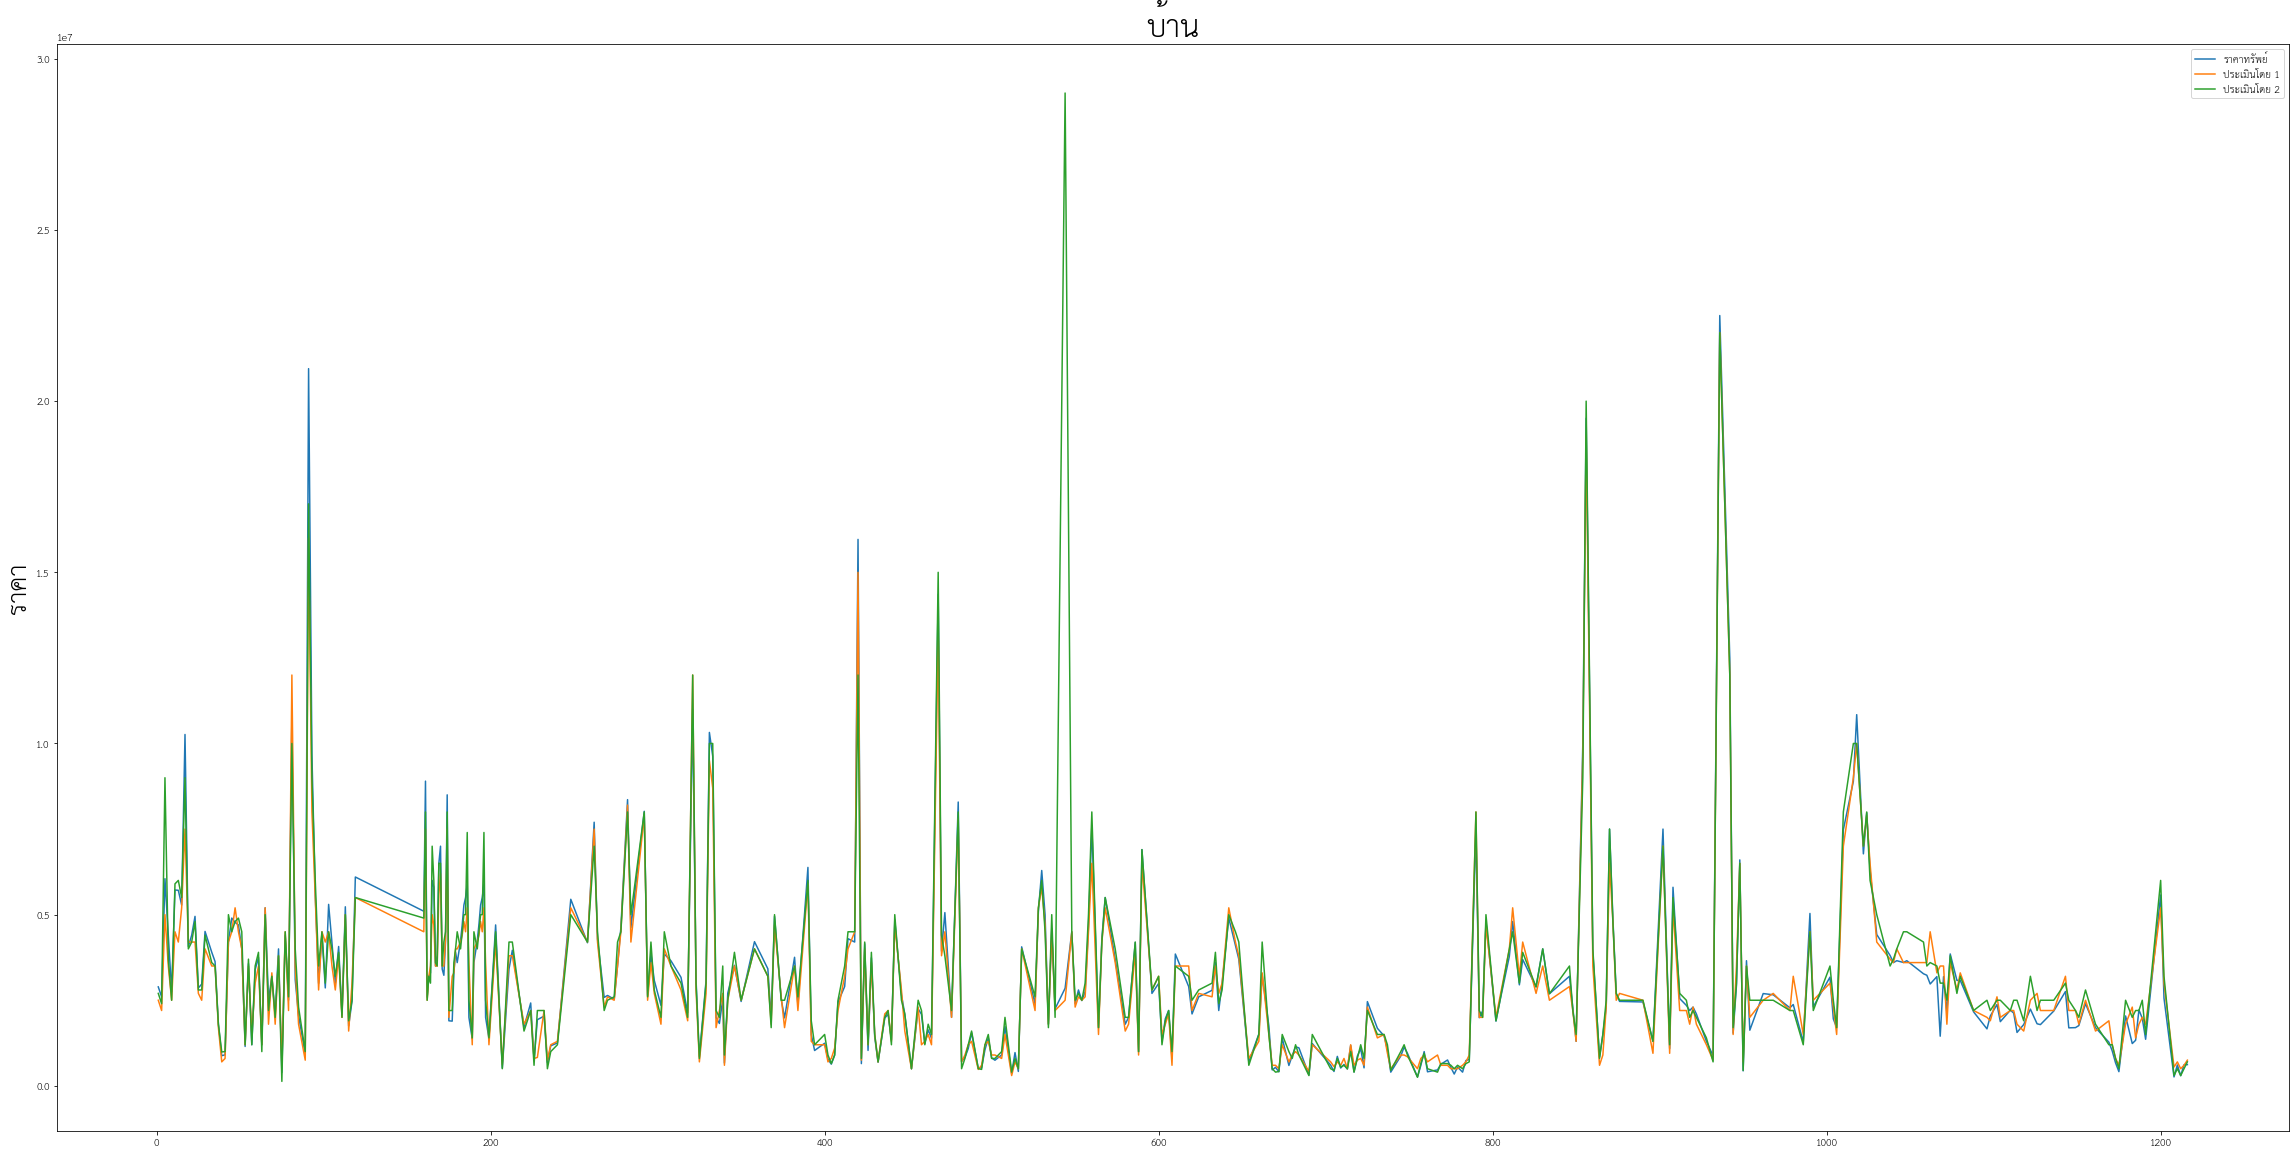

In [200]:
dataF1.plot(kind="line")
plt.title('บ้าน',fontsize=30)
plt.ylabel('ราคา',fontsize=25)
plt.show()

###แสดงความสัมพันธ์ความมั่นใจ

###แสดงความสัมพันธ์ให้คะแนนทรัพย์

##ที่ดิน

In [193]:
Est_L1 = land2[land2['ID ผู้ประเมิน']==1]
Est_L2 = land2[land2['ID ผู้ประเมิน']==2]
Est_L1_nodup = Est_L1.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est_L2_nodup = Est_L2.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est_L2['ประเมินโดย 1'] = Est_L2['post id'].map(Est_L1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Est_L2['ประเมินโดย 2'] = Est_L2['post id'].map(Est_L2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Table02 = Est_L2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
Table2 = Table02.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
Table2

<ipython-input-193-42462d7dd3bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Est_L2['ประเมินโดย 1'] = Est_L2['post id'].map(Est_L1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
<ipython-input-193-42462d7dd3bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Est_L2['ประเมินโดย 2'] = Est_L2['post id'].map(Est_L2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);


,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
196,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
198,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
200,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
202,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


###แสดงความสัมพันธ์ราคาตั้งขายและราคาประเมิน

In [192]:
dataF2 = DataFrame(Table2,columns=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
print(dataF2)

     ราคาทรัพย์  ประเมินโดย 1  ประเมินโดย 2
1       2800000     1800000.0     2000000.0
4      14900000     8000000.0    12000000.0
7      90000000    18000000.0    70000000.0
10     65000000    35000000.0    60000000.0
13      3000000     2200000.0     2500000.0
..          ...           ...           ...
196     5000000     4000000.0     4000000.0
198      750000      500000.0      750000.0
200     2650000     2000000.0     2500000.0
202     1300000     1500000.0     1500000.0
204     3000000     2500000.0     2800000.0

[92 rows x 3 columns]


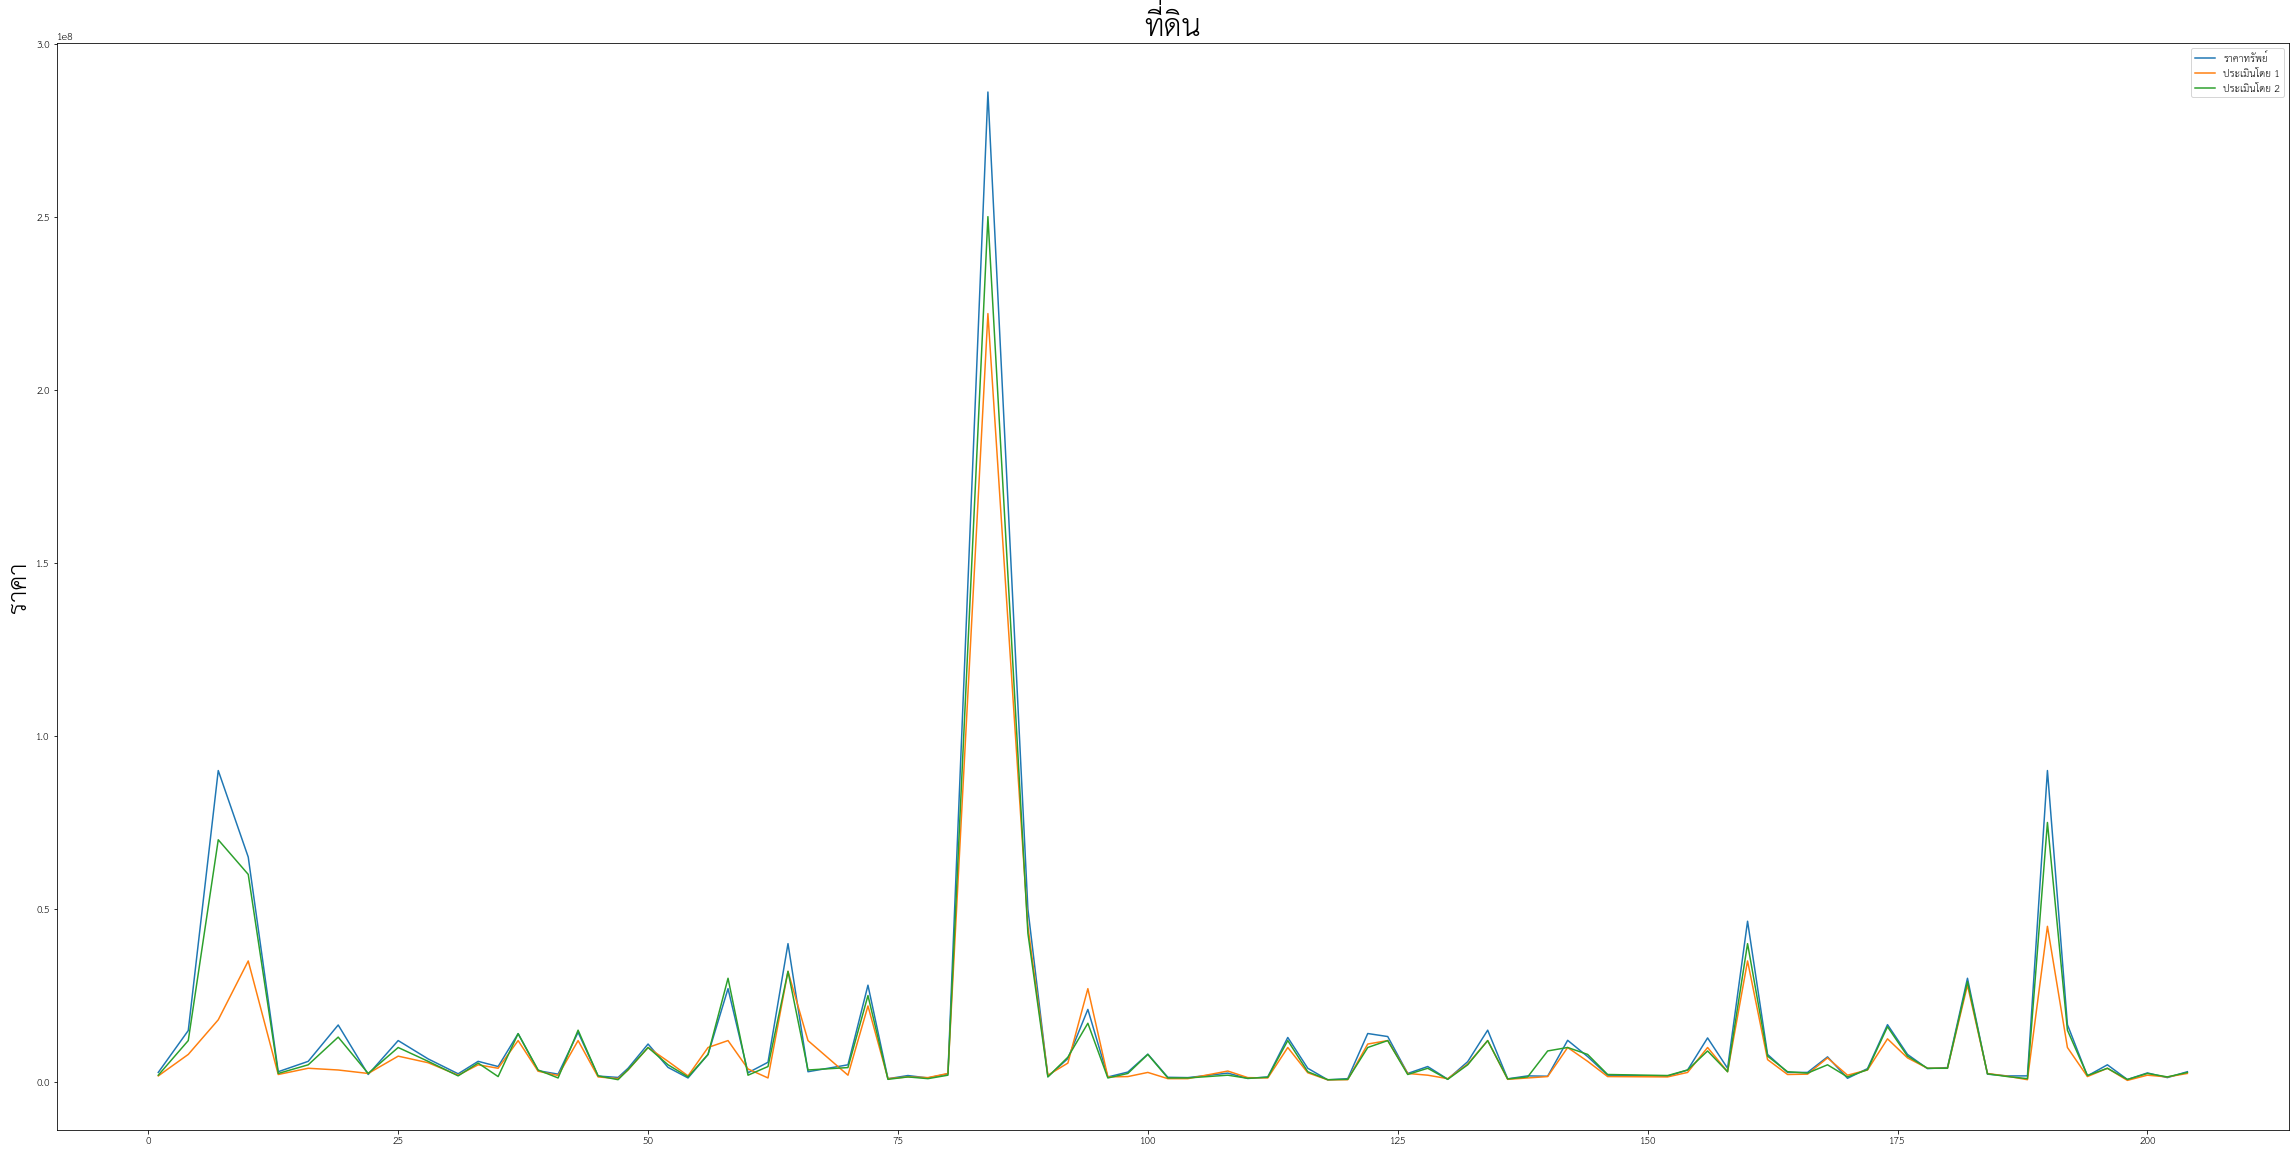

In [199]:
dataF2.plot(kind="line")
plt.title('ที่ดิน',fontsize=30)
plt.ylabel('ราคา',fontsize=25)
plt.show()

###แสดงความสัมพันธ์ความมั่นใจ

###แสดงความสัมพันธ์ให้คะแนนทรัพย์

##ทาวน์โฮม

In [ ]:
Est_T1 = townhome2[townhome2['ID ผู้ประเมิน']==1]
Est_T2 = townhome2[townhome2['ID ผู้ประเมิน']==2]
Est_T1_nodup = Est_T1.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est_T2_nodup = Est_T2.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est_T2['ประเมินโดย 1'] = Est_T2['post id'].map(Est_T1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Est_T2['ประเมินโดย 2'] = Est_T2['post id'].map(Est_T2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Table04 = Est_T2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
Table4 = Table04.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
Table4

###แสดงความสัมพันธ์ราคาตั้งขายและราคาประเมิน

In [ ]:
dataF4 = DataFrame(Table4,columns=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
print(dataF4)

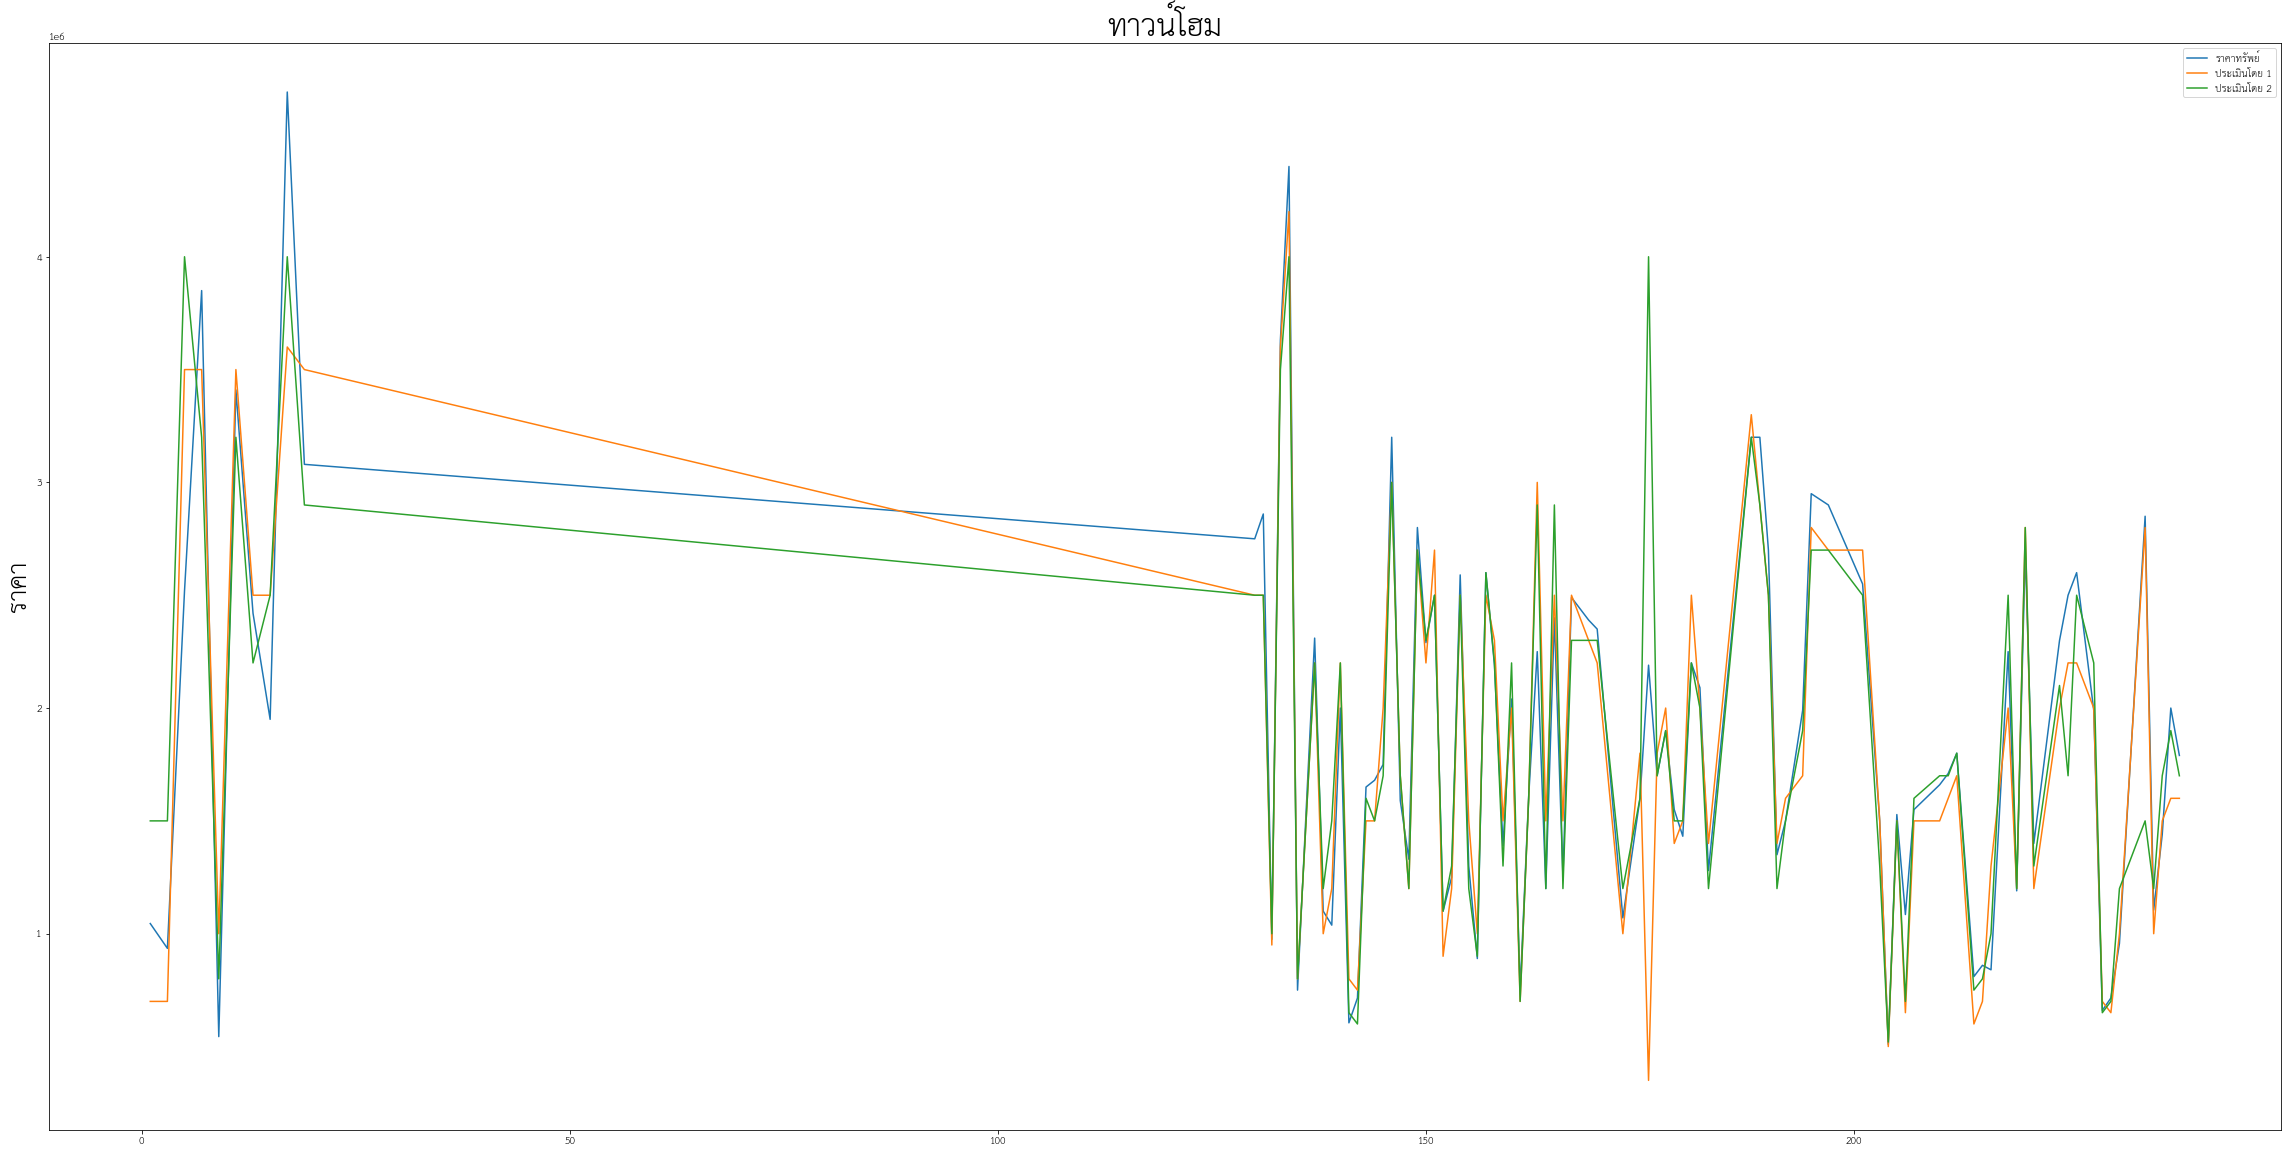

In [201]:
dataF4.plot(kind="line")
plt.title('ทาวน์โฮม',fontsize=30)
plt.ylabel('ราคา',fontsize=25)
plt.show()

###แสดงความสัมพันธ์ความมั่นใจ

###แสดงความสัมพันธ์ให้คะแนนทรัพย์

##อาคารพาณิชย์

In [ ]:
Est_F1 = office2[office2['ID ผู้ประเมิน']==1]
Est_F2 = office2[office2['ID ผู้ประเมิน']==2]
Est_F1_nodup = Est_F1.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est_F2_nodup = Est_F2.drop_duplicates(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
Est_F2['ประเมินโดย 1'] = Est_F2['post id'].map(Est_F1_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Est_F2['ประเมินโดย 2'] = Est_F2['post id'].map(Est_F2_nodup.set_index('post id')['ประเมินราคาซื้อ-ขาย']);
Table05 = Est_F2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
Table5 = Table05.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
Table5

###แสดงความสัมพันธ์ราคาตั้งขายและราคาประเมิน

In [ ]:
dataF5 = DataFrame(Table5,columns=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
print(dataF5)

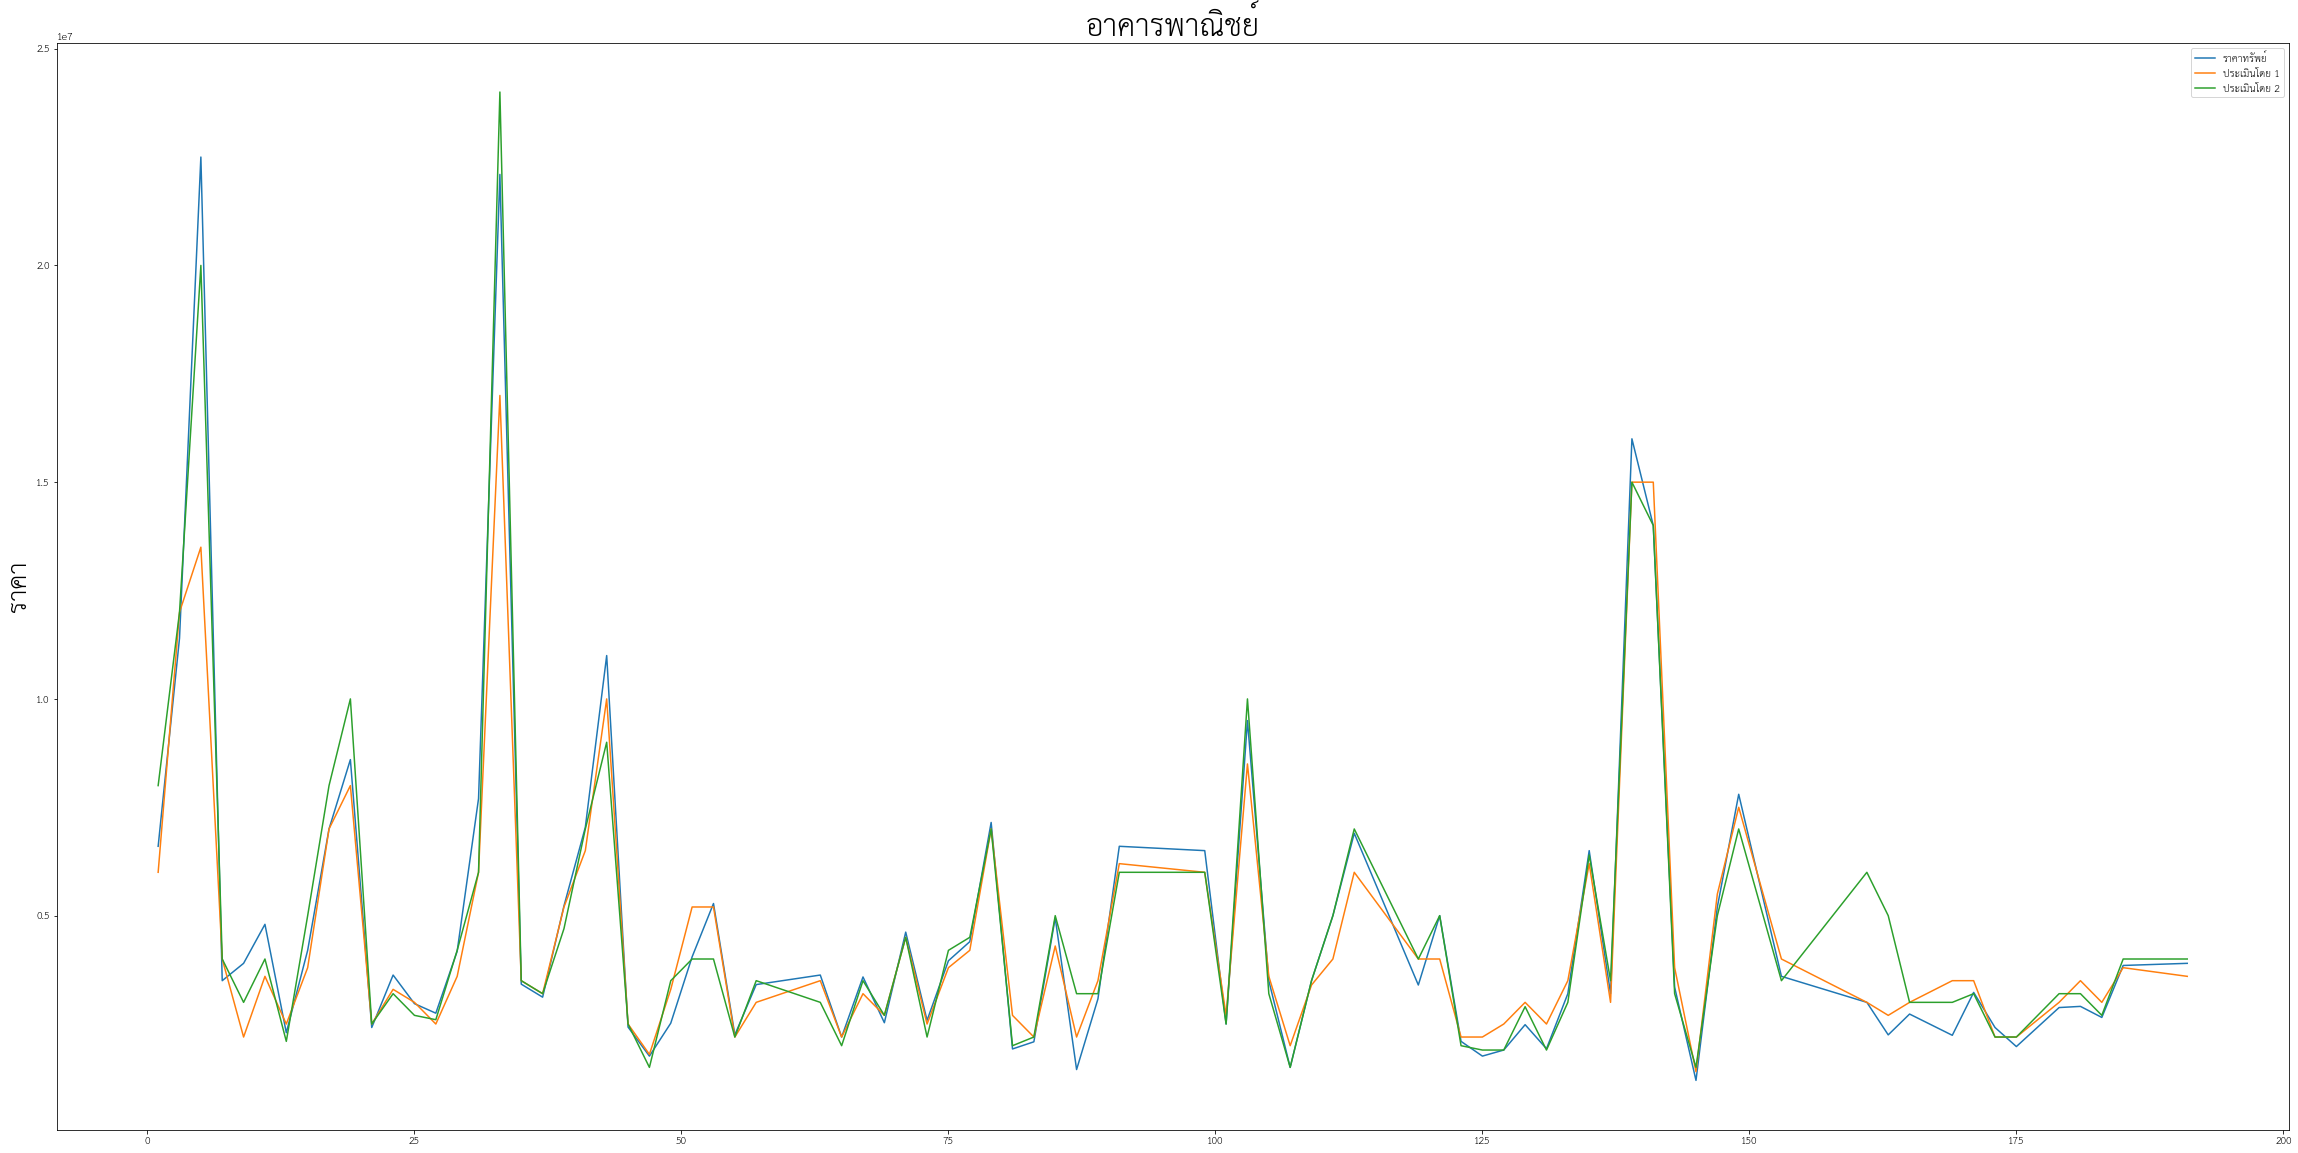

In [202]:
dataF5.plot(kind="line")
plt.title('อาคารพาณิชย์',fontsize=30)
plt.ylabel('ราคา',fontsize=25)
plt.show()

###แสดงความสัมพันธ์ความมั่นใจ

###แสดงความสัมพันธ์ให้คะแนนทรัพย์